In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("LOAN DATA.csv")

In [3]:
# Preview of dataset
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
425,LP002366,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,1.0,Rural,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
341,LP002116,Female,No,0,Graduate,No,2378,0.0,46.0,360.0,1.0,Rural,N
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
307,LP001994,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,N
543,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
590,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y


In [4]:
# Discarding unnecessay feature
df.drop(columns='Loan_ID',inplace=True)

In [5]:
# Checking for number of rows and columns
df.shape

(614, 12)

In [6]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Observation:-
* Dataset contains 614 rows and 12 columns
* Dataset contains both numerical and categorcial features
* Dataset contains missing values in some features

In [7]:
# Statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [9]:
# Checking for number of lables in every features
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
# Checking for missing values and It's percentage
a = df.isna().sum().sort_values(ascending=False)
b = (df.isna().sum().sort_values(ascending=False))*100/df.shape[0]
pd.concat([a,b],axis=1,keys=['Total','Percentage'])

,Total,Percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


## Handling missing values

In [11]:
# Filling missing values with its mode in Credit history  feature
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
# Filling missing values with its mode in Self_Employed  feature
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
# Filling missing values with its median in 'LoanAmount feature
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
# Filling missing values with its mode in Dependents feature
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
# Filling missing values with its mean in Loan_Amount_Term feature
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
# Filling missing values with its mode in Gender feature
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
# Filling missing values with its mode in Married feature
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

# Checking if any missing value is still present or not
df.isna().sum().sum()

0

# Univariate Analysis

### Data Visualization of categorical features

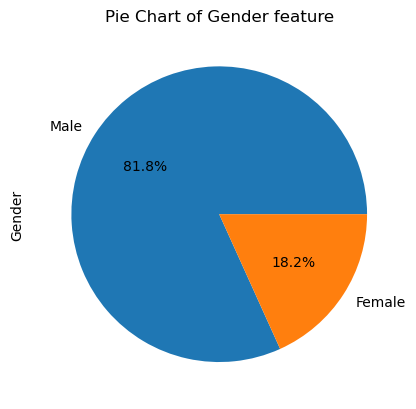

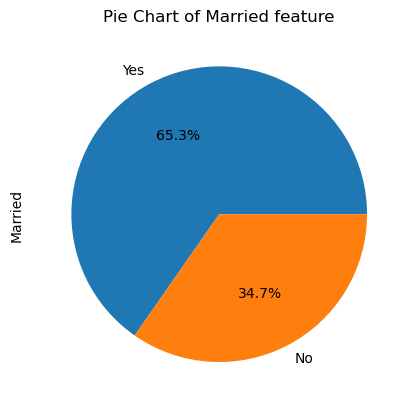

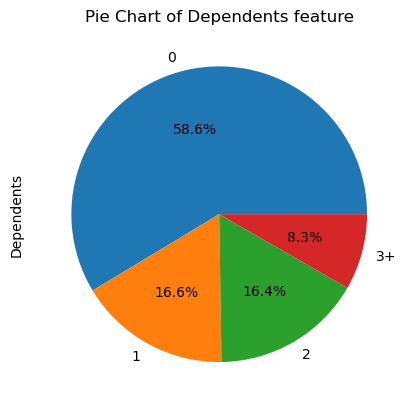

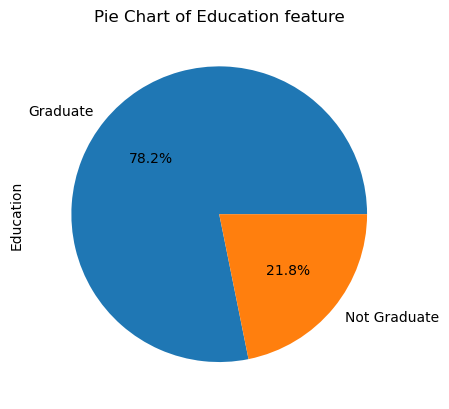

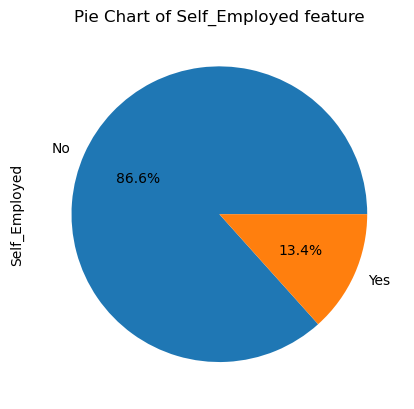

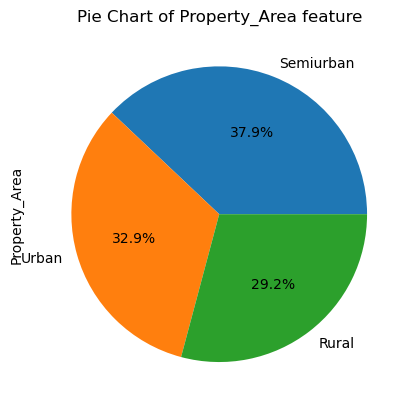

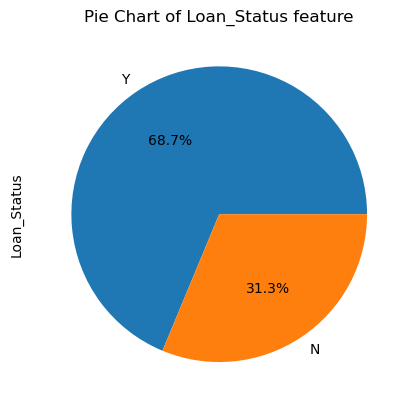

In [12]:
# Categorical Features
cat_var = [x for x in df.columns if df[x].dtype=='O']
# Pie Chart with percentage of categorical features
for i in cat_var:
    plt.figure()
    df[i].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
    plt.title(f"Pie Chart of {i} feature")
    plt.show()

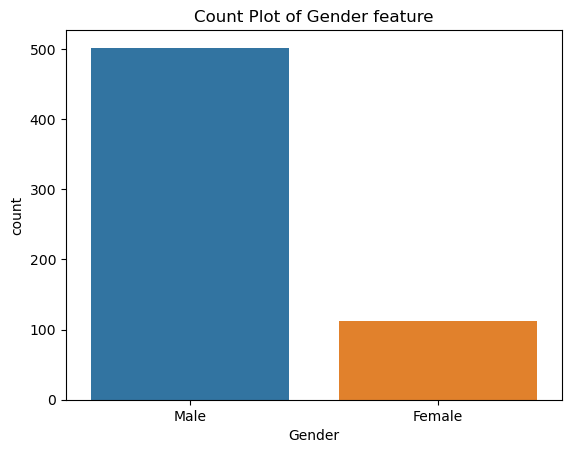

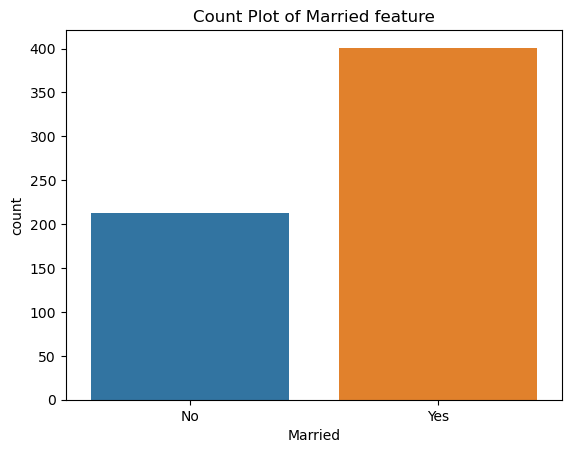

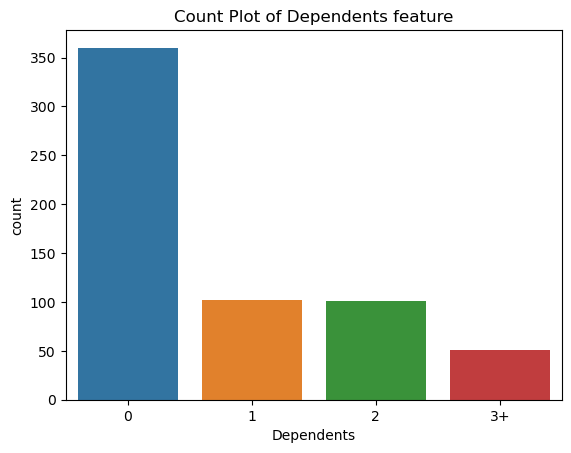

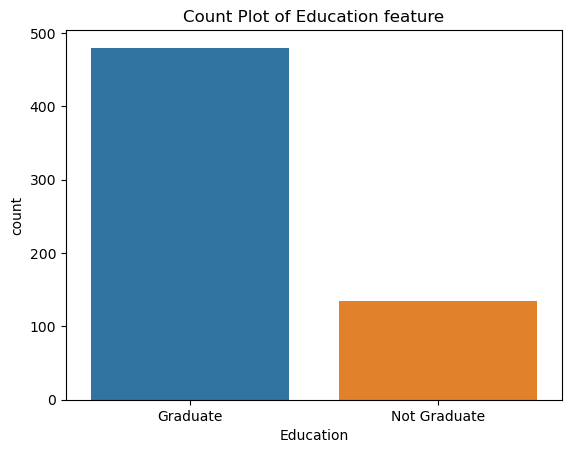

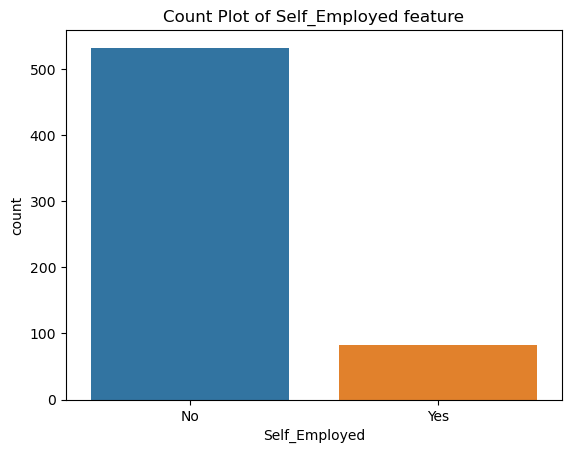

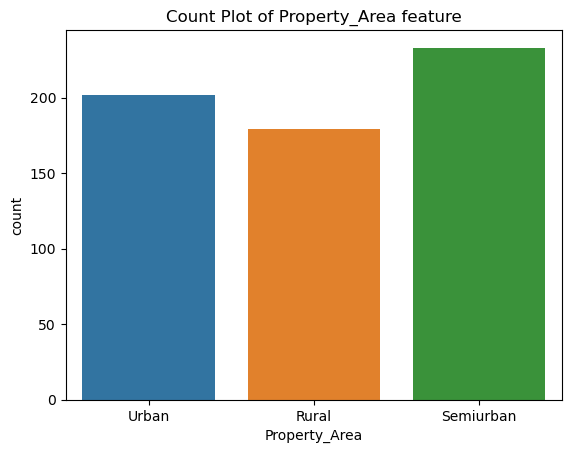

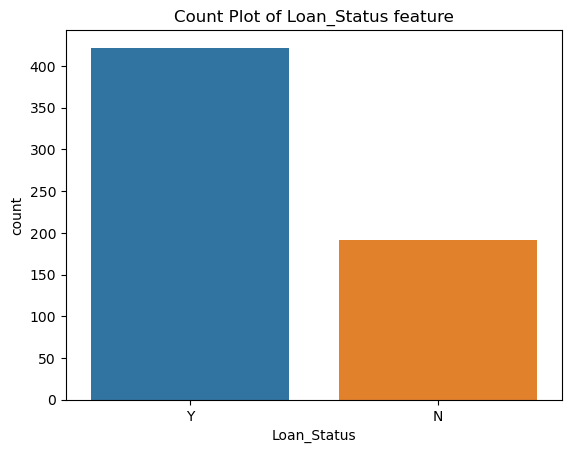

In [13]:
# Countplot of categorical features
cat_var = [x for x in df.columns if df[x].dtype=='O']
for i in cat_var:
    plt.figure()
    sns.countplot(x=df[i])
    plt.title(f"Count Plot of {i} feature")
    plt.show()

### Data visualization of numerical features

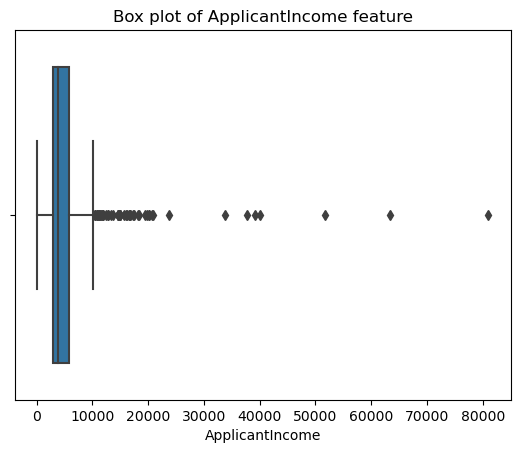

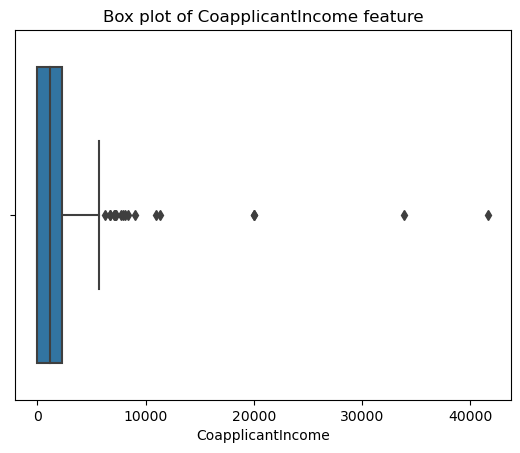

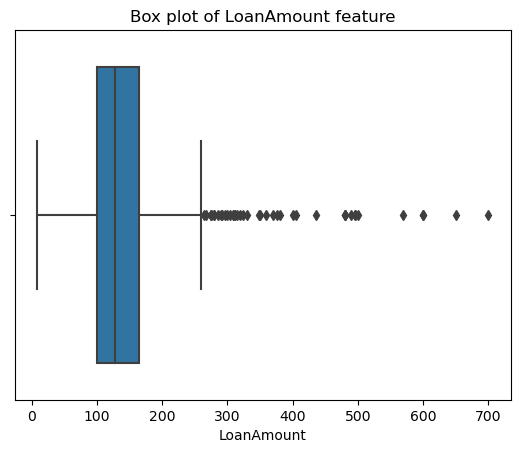

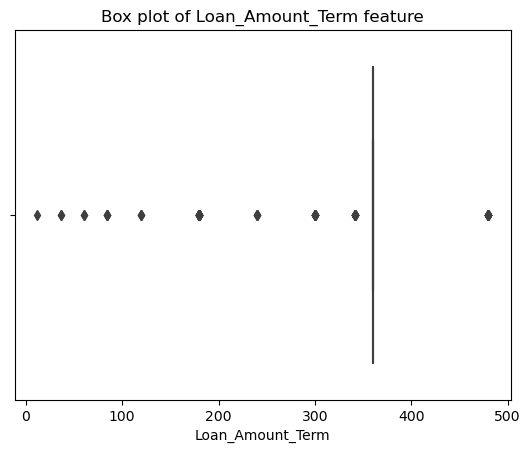

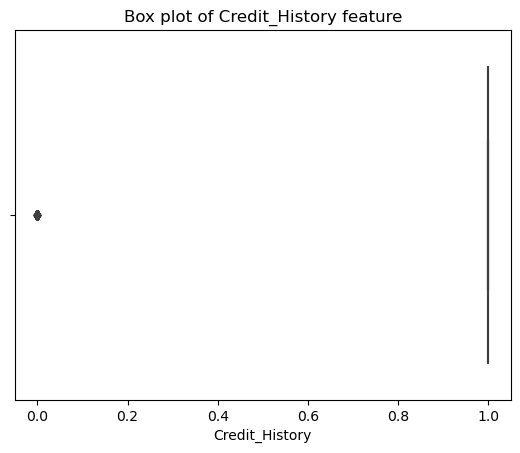

In [14]:
# Numerical features
num_var = [i for i in df.columns if df[i].dtype != 'O']
# Plotting Box plot for every numerical features
for i in num_var:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.title(f"Box plot of {i} feature")
    plt.show()

* Since Credit history is a numerical feature but it behave like categorical beacuse it only consist two unique values, so let's see pie chart of credit history feature

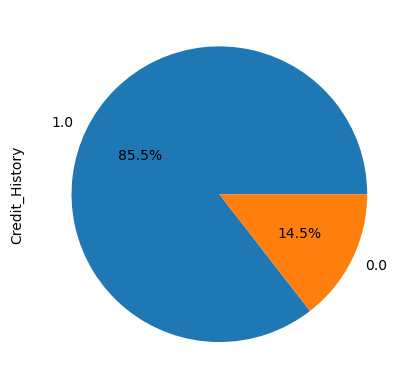

In [15]:
# Viusalization of credit history feature
df['Credit_History'].value_counts().plot(kind = 'pie',autopct='%1.1f%%');

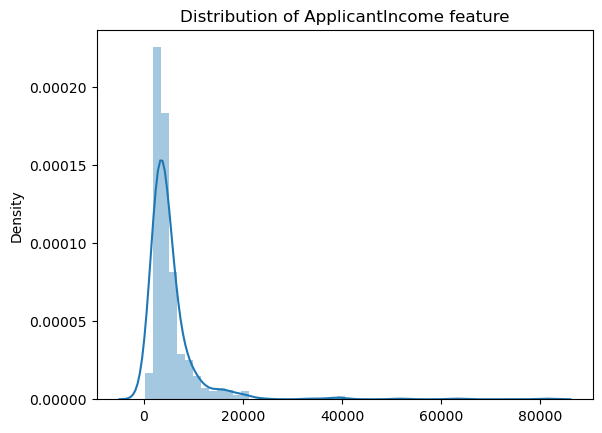

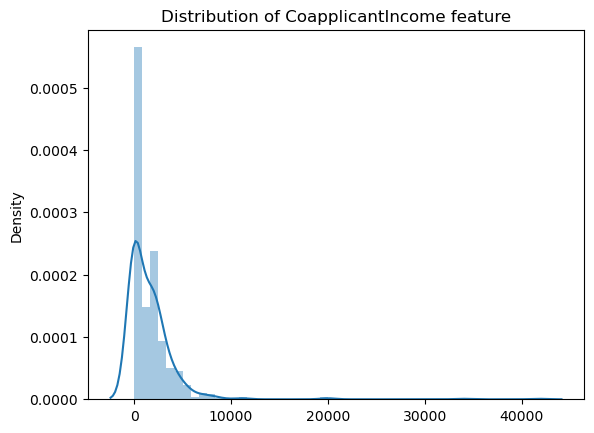

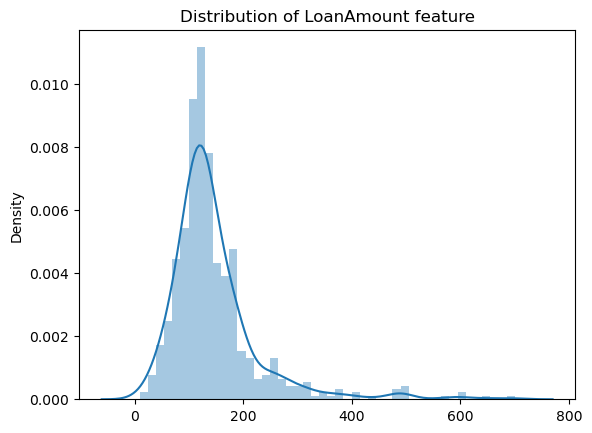

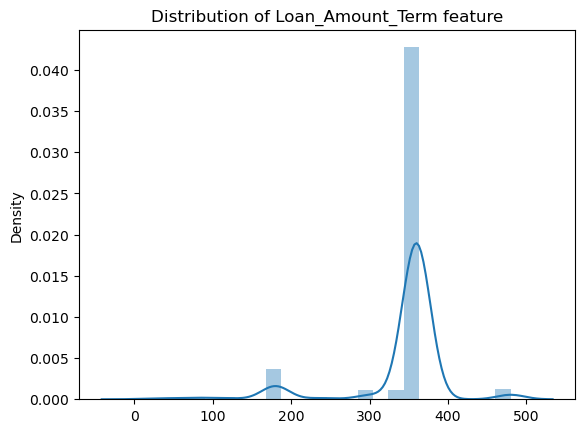

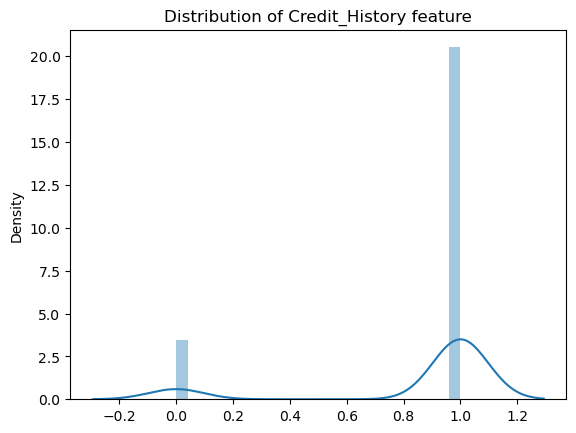

In [16]:
# Plotting distplot plot for every numerical features to see distribution
for i in num_var:
    plt.figure()
    sns.distplot(x=df[i])
    plt.title(f"Distribution of {i} feature")
    plt.show()

# Bivariate and multivariate analysis

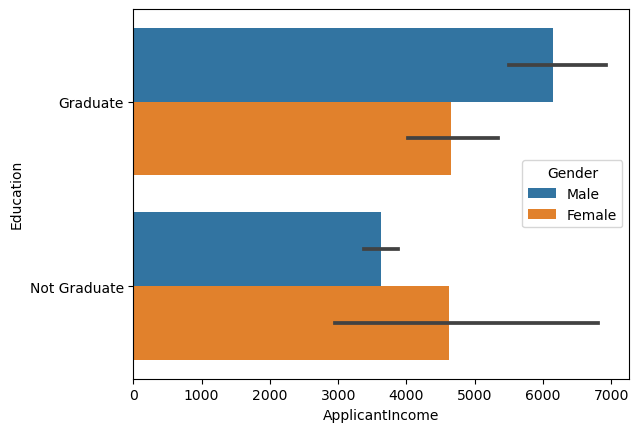

In [17]:
# Let's analize education and applicant income based on gender 
sns.barplot(x=df['ApplicantIncome'],y=df['Education'],hue=df['Gender']);

* Female that are not graduate earns more compared to males that are not graduated.

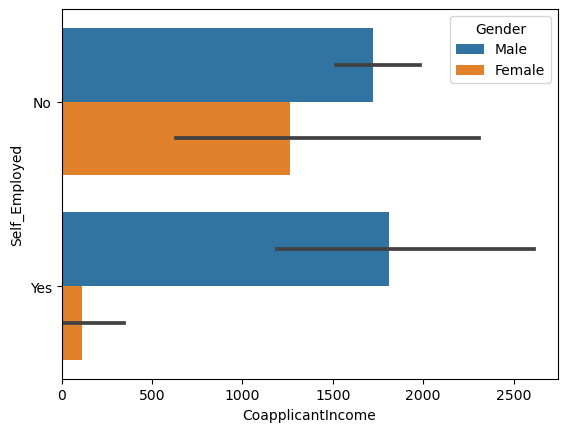

In [18]:
# Coapplicanticome and Self_Employed
sns.barplot(x=df['CoapplicantIncome'],y=df['Self_Employed'],hue=df['Gender']);

* Self employed coapplicant males has significantly more income comapred to females.

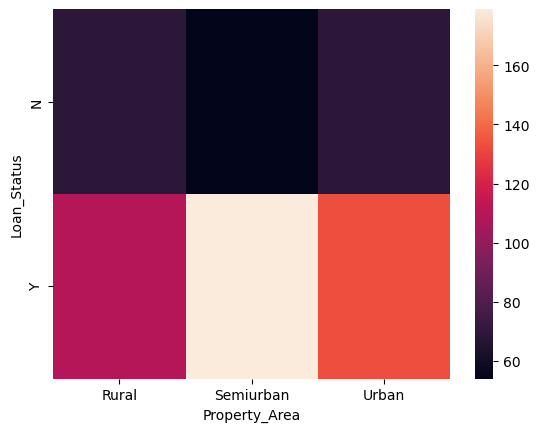

In [19]:
# Let's analaize which area (ubran area or semiurban or rural area) applications are mostly approved
sns.heatmap(pd.crosstab(df['Loan_Status'],df['Property_Area']));

* Loan status of semi urban are accepted and rejected mostly comapred to others.

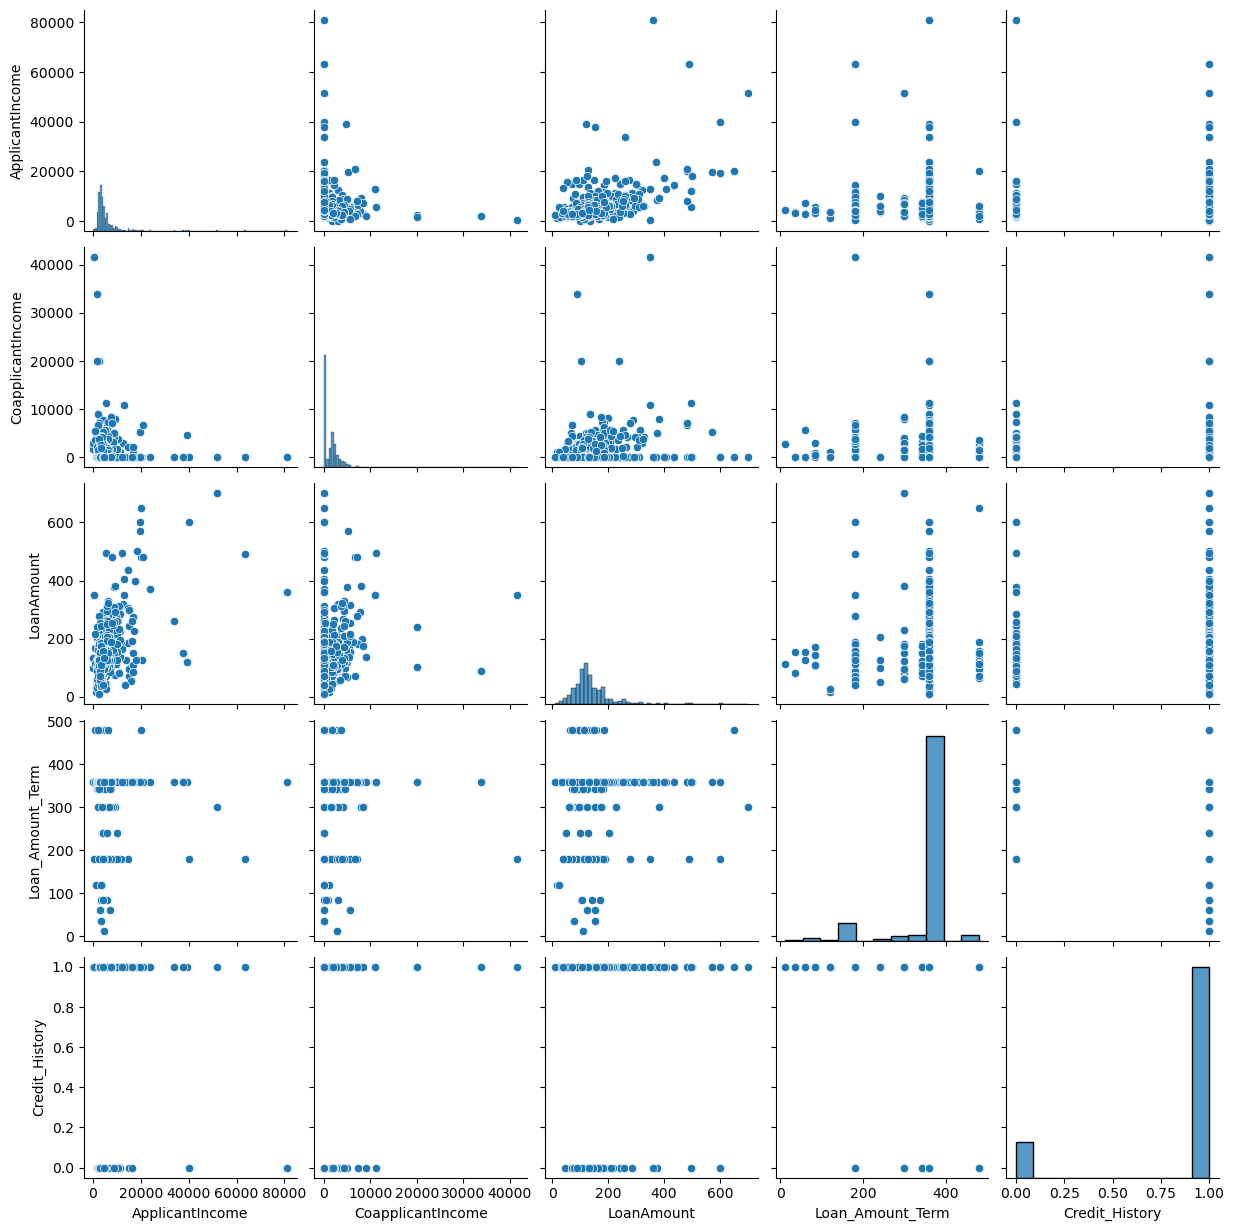

In [20]:
# Let's see distibution and scatterplot of every numerical features in dataset
sns.pairplot(df);

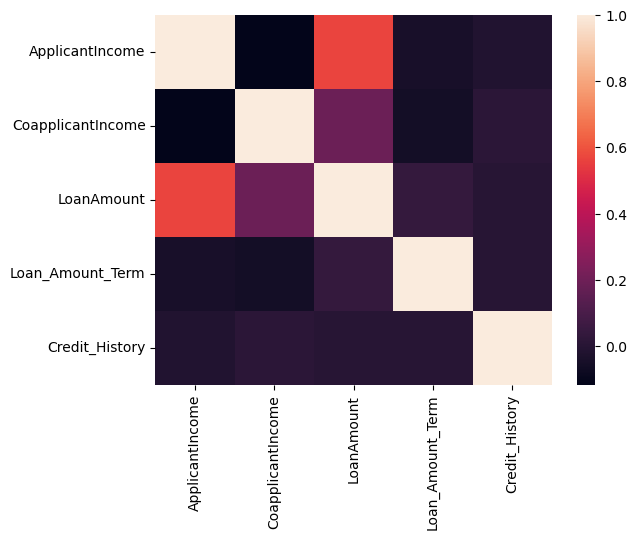

In [21]:
#Let's visualize correlation between numerical features
sns.heatmap(df.corr());

## Extracting the independent features and dependent feature

In [22]:
X = df.iloc[:,:-1] # Independent features
y = df.iloc[:,-1] # Dependent feature

In [23]:
# Importing required ML libraries
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,StackingClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

# Feature Engineering

In [24]:
# Encdoing the target variable
label = LabelEncoder()
y = label.fit_transform(y)

In [25]:
# Dividing the dataset into training and test data using train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban
281,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural
32,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural
204,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
534,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban
584,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural
493,Female,No,0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban
527,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban


# Logistic Regression Model

In [26]:
# Encdoing categorical features
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,2,3,4,9,10])],
                          remainder='passthrough')

# Applying Logistic Regression
step2 = LogisticRegression(penalty='l1',max_iter=50,solver='liblinear') # Using liblinear as solve because it's a small dataset

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

# Storing the logistic regression model predicted value in a variable
y_pred = pipe.predict(X_test)

# Evaluation of the model
print(f"Accuarcy of Logistic Regression Model is : {accuracy_score(y_test,y_pred)}")  # Checking accuracy score

# Cross validation
print(f"After doing Cross Validation, average accuarcy score is : {cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()}")

Accuarcy of Logistic Regression Model is : 0.7560975609756098
After doing Cross Validation, average accuarcy score is : 0.8167182024324882


### Let's do parameter tuning to improve performance of model

In [27]:
# Parameter tuning using gridsearchcv
params = {'step2__penalty':['l1','l2','elasticnet','none'],'step2__max_iter':[50,100,200,300]}
grid = GridSearchCV(pipe,param_grid=params,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)
print(f"Best paramters are: {grid.best_params_}")
print(f"Best Accuracy Score: {grid.best_score_}")

Best paramters are: {'step2__max_iter': 50, 'step2__penalty': 'l1'}
Best Accuracy Score: 0.8166938775510204


# Ridge Classifier Model

In [28]:
# Encdoing categorical features
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,2,3,4,9,10])],
                          remainder='passthrough')

# Applying RidgeClassifier
step2 = RidgeClassifier()

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

# Storing the logistic regression model predicted value in a variable
y_pred = pipe.predict(X_test)

# Evaluation of the model
print(f"Accuarcy of Ridge Classifier Model is : {accuracy_score(y_test,y_pred)}")  # Checking accuracy score

# Cross validation
print(f"After doing Cross Validation, average accuarcy score is : {cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()}")

Accuarcy of Ridge Classifier Model is : 0.7723577235772358
After doing Cross Validation, average accuarcy score is : 0.8187384044526901


### Let again do hyperparameter tuning to increase the performance of Ridge Classifier model

In [29]:
# We will use grid search CV to do this task
params = {'step2__alpha':[0.0001,0.001,0.01,1.0,10]} 
grid = GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(f"Best paramters are: {grid.best_params_}")
print(f"Best Accuracy Score: {grid.best_score_}")

Best paramters are: {'step2__alpha': 0.0001}
Best Accuracy Score: 0.8187384044526901


* Best value of alpha will be 0.0001.

# DecisionTreeClassifier Model

In [30]:
# Encdoing categorical features
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,2,3,4,9,10])],
                          remainder='passthrough')

# Applying DecisionTreeClassifier
step2 = DecisionTreeClassifier(criterion='gini',max_depth=30, min_samples_split=100,splitter='random')

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

# Storing the logistic regression model predicted value in a variable
y_pred = pipe.predict(X_test)

# Evaluation of the model
print(f"Accuarcy of Decsion Tree Classifier is : {accuracy_score(y_test,y_pred)}")  # Checking accuracy score

# Cross validation
print(f"After doing Cross Validation, average accuarcy score is : {cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()}")

Accuarcy of Decsion Tree Classifier is : 0.6991869918699187
After doing Cross Validation, average accuarcy score is : 0.8085755514326942


* Since accuarcy score came really bad compared to Logistic regression model,let's improve the performance of model by hyperparamter tuning using gridsearchcv

In [31]:
# GridSearchCV
params = {'step2__criterion':['gini','entropy'],
    'step2__splitter':['best','random'],
    'step2__max_depth':['none',10,20,30],
    'step2__min_samples_split':[2,10,50,100]}
grid = GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(f"Best paramters are: {grid.best_params_}")
print(f"Best Accuracy Score: {grid.best_score_}")

Best paramters are: {'step2__criterion': 'entropy', 'step2__max_depth': 30, 'step2__min_samples_split': 100, 'step2__splitter': 'random'}
Best Accuracy Score: 0.810616367759225


* Now we will use ensemble machine learning models to see if we can improve performance.

# Voting Classifier Model

In [32]:
# Encdoing categorical features
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,2,3,4,9,10])],
                          remainder='passthrough')

# Applying VotingClassifier
estimator = [('logisticRegression',LogisticRegression(penalty='l1',max_iter=50,solver='liblinear')),('Dt',DecisionTreeClassifier()),('RF',RandomForestClassifier())]
step2 = VotingClassifier(estimators=estimator,voting='soft')

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

# Storing the logistic regression model predicted value in a variable
y_pred = pipe.predict(X_test)

# Evaluation of the model
print(f"Accuarcy of Ridge Classifier Model is : {accuracy_score(y_test,y_pred)}")  # Checking accuracy score

# Cross validation
print(f"After doing Cross Validation, average accuarcy score is : {cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()}")

Accuarcy of Ridge Classifier Model is : 0.7398373983739838
After doing Cross Validation, average accuarcy score is : 0.7841475984333128


* Voting classifier is not a good choice to go with.

# RandomForestClassifier Model

In [33]:
# Encdoing categorical features
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,2,3,4,9,10])],
                          remainder='passthrough')

# Applying RandomForestClassifier
step2 = RandomForestClassifier(criterion='entropy',max_depth=10)

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])

# Creating a pipeline which will chain together both transformation steps
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

# Storing the logistic regression model predicted value in a variable
y_pred = pipe.predict(X_test)

# Evaluation of the model
print(f"Accuarcy of Random Forest Classifier is : {accuracy_score(y_test,y_pred)}")  # Checking accuracy score

# Cross validation
print(f"After doing Cross Validation, average accuarcy score is : {cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()}")

Accuarcy of Random Forest Classifier is : 0.7560975609756098
After doing Cross Validation, average accuarcy score is : 0.8207586064728922


*  Now let's improve performance of this model using hyperparameter tuning to see if we came improve impressive like decison tree

In [34]:
# GridSearchCV
params = {'step2__n_estimators':[50,100,200],'step2__criterion':['gini','entropy'],'step2__max_depth':['none',10,20,30],}
grid = GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(f"Best paramters are: {grid.best_params_}")
print(f"Best Accuracy Score: {grid.best_score_}")

Best paramters are: {'step2__criterion': 'entropy', 'step2__max_depth': 10, 'step2__n_estimators': 100}
Best Accuracy Score: 0.8207792207792208
